# DSC640-T301 Data Presentation & Visualizat (2247-1)

Term Project Task 1: Dashboard

Assignment Week 1&2;

Author:Zemelak Goraga;

Date: 6/15/2024

## Term Project Topic: Airplane Crash Data Analysis - Unveiling the Truth Behind Aviation Safety

Introduction:

Recent media coverage of airplane crashes has sparked public concern about the safety of air travel. This project was undertaken to analyze historical airplane crash data and provide a data-driven response to these concerns. By examining trends, identifying common causes, and highlighting areas for improvement, the study aims to restore public confidence in air travel and guide future safety measures.

Statement of the Problem:

The aviation industry faces significant scrutiny due to recent airplane crashes and the subsequent media portrayal of air travel as increasingly unsafe. This negative perception can lead to a decline in airline sales and erode public trust. There is a pressing need for a comprehensive analysis of historical airplane crash data to provide factual insights and address these concerns.

About the Dataset:

The dataset ("Airplane_Crashes_and_Fatalities_Since_1908.csv") used for this analysis was sourced from Kaggle: ("https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908"). It encompasses airplane crash data from 1908 to 2009. It contains 5268 observations and includes 13 variables: Date, Time, Location, Operator, Flight Number, Route, Type of Aircraft, Registration, Number Aboard, Number of Fatalities, Ground Casualties, and a Summary of each crash.


Research questions:

1. What is the trend of airplane crashes over the years from 1908 to 2009?

2. Are certain airlines more prone to crashes compared to others?

3. Which geographic regions report the highest number of airplane crashes?

4. What are the common causes of airplane crashes, and how do they vary over time?



Methodology:

Data Cleaning and Preprocessing:

Handling missing values.
Converting date and time columns to appropriate formats.
Extracting year, month, and day from the date column.
Exploratory Data Analysis (EDA):

Analyzing trends in crashes over the years.
Identifying operators with the highest number of crashes.
Analyzing geographic distribution of crashes.
Performing text analysis on crash summaries to identify common causes.
Visualization and Communication:

Creating interactive dashboards to visualize key insights.
Using Plotly, Dash, and Seaborn for professional and interactive visualizations.


## Term Project Task 1: Dashboard

In [2]:
# importing the required libraries

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import textblob
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Set seaborn style and options
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
# Read the data into the dataframe
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv", low_memory=False)
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
# Display the column data types
print(df.dtypes)


Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object


In [4]:
# Handle missing values
null_ind = []
null_val = []
for col in df.columns:
    null_ind.append(col + " % null : ")
    try:
        value = (pd.isnull(df[col]).value_counts()[True] / df.shape[0]) * 100
    except KeyError:
        value = 0
    null_val.append(round(value, 3))

null_table = pd.Series(null_val, index=null_ind)
null_table.sort_values(ascending=False, inplace=True)
print(null_table)
# Convert "Date" column datatype from string type to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

Flight # % null :         79.708
Time % null :             42.122
Route % null :            32.384
cn/In % null :            23.311
Summary % null :           7.403
Registration % null :      6.359
Type % null :              0.513
Aboard % null :            0.418
Ground % null :            0.418
Location % null :          0.380
Operator % null :          0.342
Fatalities % null :        0.228
Date % null :              0.000
dtype: float64


In [5]:
import datetime
import numpy as np

# Function to convert "Time" column datatype from string to datetime format
def make_datetime(x):
    if isinstance(x, str):
        try:
            return datetime.datetime.strptime(x, '%H:%M').time()
        except ValueError:
            return np.nan
    else:
        return np.nan

df["Time"] = df["Time"].apply(make_datetime)


In [6]:
# Extracting the year, month, and day out of the Date column
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [7]:
# Drop rows with null values in critical columns for analysis
df.dropna(subset=["Date", "Year", "Month", "Day", "Operator"], inplace=True)

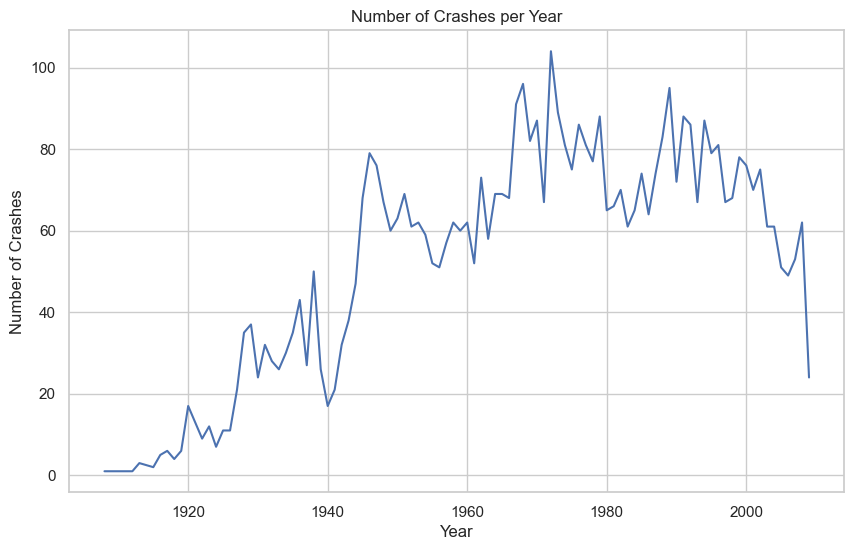

In [8]:
# Exploratory Data Analysis
# 1. Number of crashes per year
df_year = df["Year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_year.index, y=df_year.values)
plt.title("Number of Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()


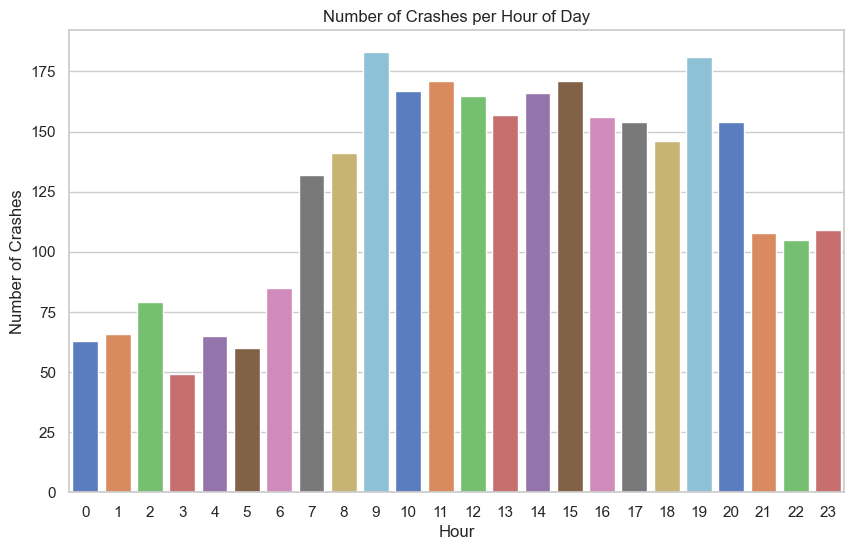

In [9]:
# 2. Number of crashes per hour
df_time = df.dropna(subset=["Time"])
df_time["Hour"] = df_time["Time"].apply(lambda x: x.hour)
df_hour = df_time["Hour"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_hour.index, y=df_hour.values, palette="muted")
plt.title("Number of Crashes per Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crashes")
plt.show()

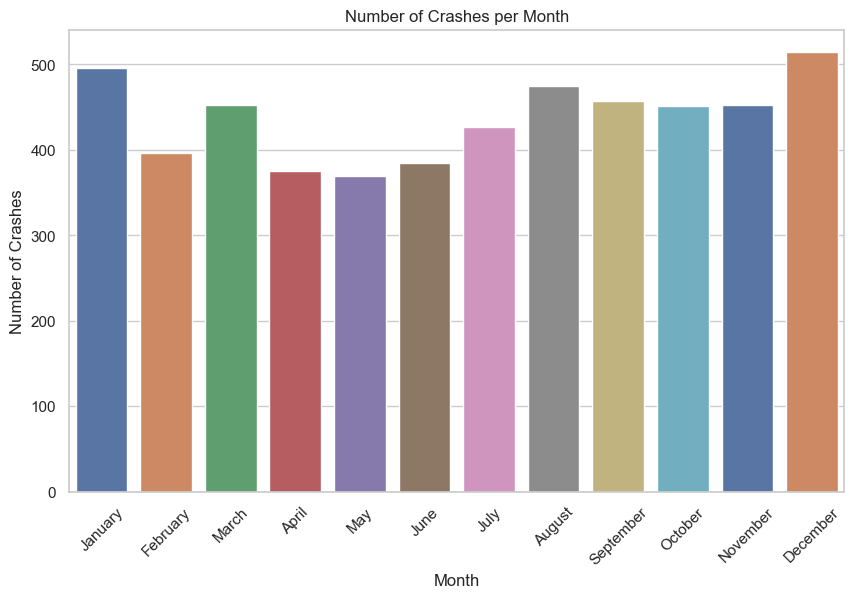

In [10]:
# 3. Number of crashes per month
df_month = df["Month"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.barplot(x=df_month.index, y=df_month.values, palette="deep")
plt.title("Number of Crashes per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(ticks=df_month.index-1, labels=months, rotation=45)
plt.show()

<Figure size 1500x500 with 0 Axes>

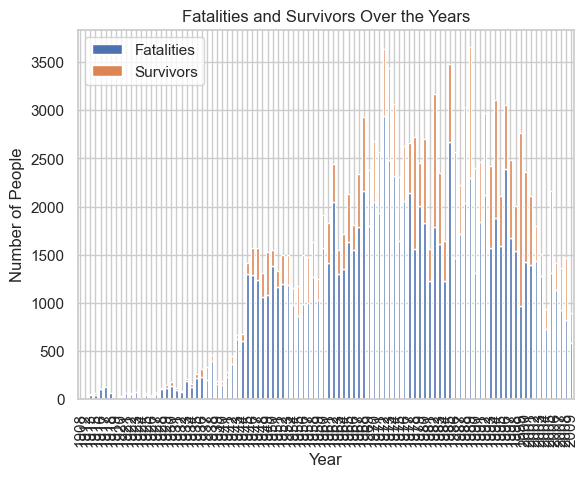

In [11]:
# 4. Total number of people aboard, fatalities, and survivors
df["Survivors"] = df["Aboard"] - df["Fatalities"]
aboard_fatalities = df.pivot_table(values=["Survivors", "Fatalities"], index="Year", aggfunc=np.sum)

plt.figure(figsize=(15, 5))
aboard_fatalities.plot(kind="bar", stacked=True)
plt.title("Fatalities and Survivors Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.show()

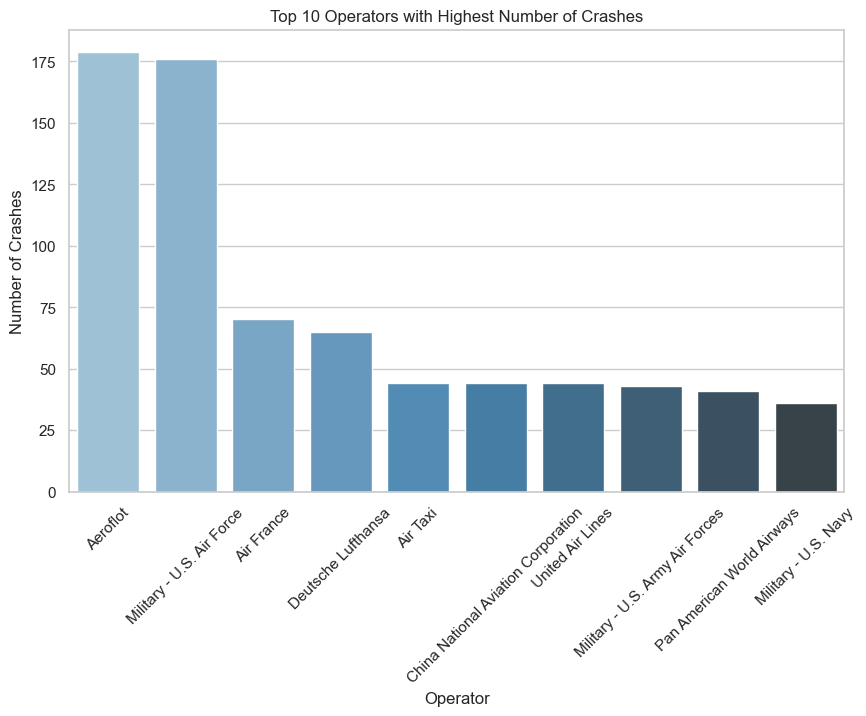

In [12]:
# 5. Operators with highest number of crashes
top_operators = df["Operator"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_operators.index, y=top_operators.values, palette="Blues_d")
plt.title("Top 10 Operators with Highest Number of Crashes")
plt.xlabel("Operator")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.show()

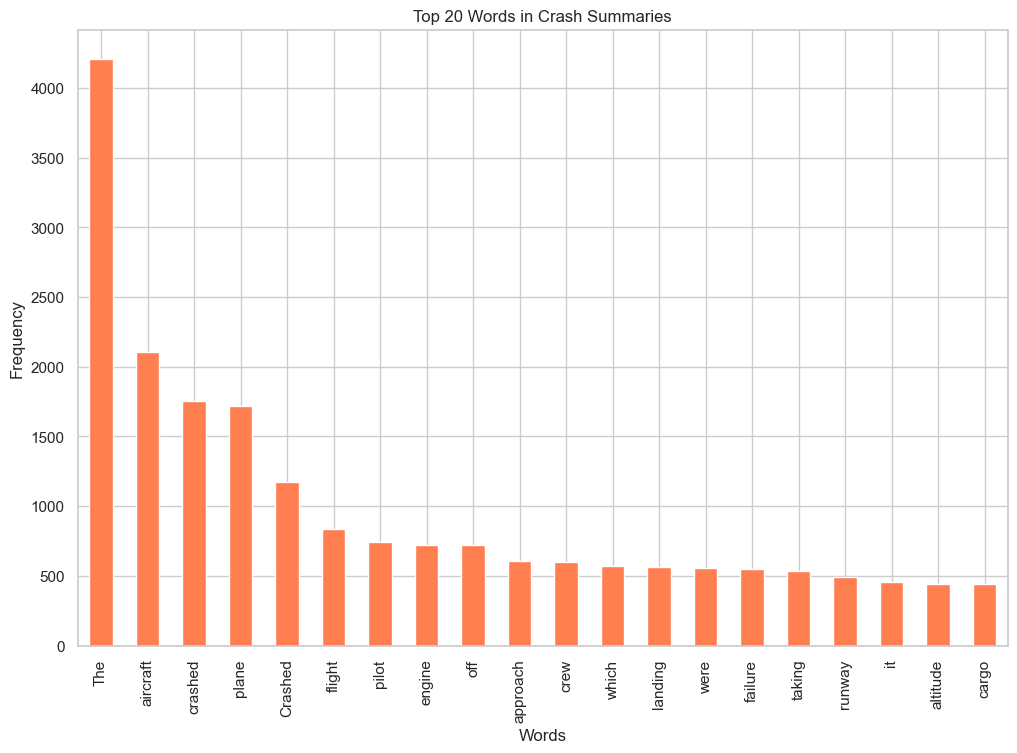

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Word frequency analysis in crash summaries
text = " ".join(summary for summary in df["Summary"].dropna())
word_count = pd.Series(text.split()).value_counts().drop(labels=['a', 'an', 'the', 'and', 'to', 'of', 'in', 'into', 'is', 'was', 'on', 'at', 'from', 'with', 'while', 'for', "'s", 'as', 'not', 'by', 'after', 'during'], errors='ignore')

plt.figure(figsize=(12, 8))
word_count.head(20).plot(kind='bar', color='coral')
plt.title("Top 20 Words in Crash Summaries")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [14]:
# Save word counts to a file
word_count.to_csv("word_count.csv", header=True)

# Creating a Dashbord with 12 visualizations 

In [21]:
# Import the required libraries

import pandas as pd
import numpy as np
import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import folium
from folium.plugins import HeatMap

# Read the data into the dataframe
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# Function to convert "Time" column datatype from string to datetime format
def make_datetime(x):
    if isinstance(x, str):
        try:
            return datetime.datetime.strptime(x, '%H:%M').time()
        except ValueError:
            return np.nan
    else:
        return np.nan

df["Time"] = df["Time"].apply(make_datetime)

# Extracting the hour out of the time column
df["Hour"] = df["Time"].apply(lambda x: x.hour if pd.notnull(x) else np.nan)

# Ensure the "Survivors" column is created correctly
df["Survivors"] = df["Aboard"] - df["Fatalities"]

# Visualization 1: Line Chart: Number of Crashes per Year
df_year = df["Year"].value_counts().sort_index()
fig1 = px.line(x=df_year.index, y=df_year.values, labels={'x': 'Year', 'y': 'Number of Crashes'},
               title='Line Plot showing Number of Crashes per Year')

# Visualization 2: Bar Chart: Number of Crashes per Hour of Day
df_hour = df["Hour"].value_counts().sort_index()
fig2 = px.bar(x=df_hour.index, y=df_hour.values, labels={'x': 'Hour', 'y': 'Number of Crashes'},
              title='Bar Chart showing Number of Crashes per Hour of Day')

# Visualization 3: Bar Chart: Number of Crashes per Month
df_month = df["Month"].value_counts().sort_index()
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig3 = px.bar(x=months, y=df_month.values, labels={'x': 'Month', 'y': 'Number of Crashes'},
              title='Bar Chart showing Number of Crashes per Month')

# Visualization 4: Stacked Bar Chart: Fatalities and Survivors Over the Years
aboard_fatalities = df.pivot_table(values=["Survivors", "Fatalities"], index="Year", aggfunc=np.sum)
fig4 = px.bar(aboard_fatalities, barmode='stack', title="Stacked Bar Chart showing Fatalities and Survivors Over the Years")

# Visualization 5: Bar Chart: Top 10 Operators with Highest Number of Crashes
top_operators = df["Operator"].value_counts().head(10)
fig5 = px.bar(x=top_operators.index, y=top_operators.values, labels={'x': 'Operator', 'y': 'Number of Crashes'},
              title='Bar Chart showing Top 10 Operators with Highest Number of Crashes')

# Visualization 6: Word Cloud: Common Words in Crash Summaries
text = " ".join(summary for summary in df["Summary"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
fig6 = go.Figure(go.Image(z=wordcloud.to_array()))
fig6.update_layout(title_text='Word Cloud showing Common Words in Crash Summaries')

# Visualization 7: Bar Chart: Number of Crashes per Aircraft Type
top_types = df["Type"].value_counts().head(10)
fig7 = px.bar(x=top_types.index, y=top_types.values, labels={'x': 'Aircraft Type', 'y': 'Number of Crashes'},
              title='Bar Chart showing Top 10 Aircraft Types with Highest Number of Crashes')

# Visualization 8: Pie Chart: Proportion of Crashes by Time of Day
time_periods = df["Hour"].apply(lambda x: 'Night' if 0 <= x < 6 else ('Morning' if 6 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening')))
time_periods = time_periods.value_counts()
fig8 = px.pie(values=time_periods.values, names=time_periods.index, title='Pie Chart showing Proportion of Crashes by Time of Day')

# Visualization 9: Bar Chart: Number of Crashes by Route
df_routes = df["Route"].dropna().value_counts().head(10)
fig9 = px.bar(x=df_routes.index, y=df_routes.values, labels={'x': 'Route', 'y': 'Number of Crashes'},
              title='Bar Chart showing Top 10 Routes with Highest Number of Crashes')

# Visualization 10: Line Chart: Fatalities and Survivors per Year
fatalities_per_year = df.groupby('Year')['Fatalities'].sum().reset_index()
survivors_per_year = df.groupby('Year')['Survivors'].sum().reset_index()
fig10 = go.Figure()
fig10.add_trace(go.Scatter(x=fatalities_per_year['Year'], y=fatalities_per_year['Fatalities'], mode='lines+markers', name='Fatalities'))
fig10.add_trace(go.Scatter(x=survivors_per_year['Year'], y=survivors_per_year['Survivors'], mode='lines+markers', name='Survivors'))
fig10.update_layout(title='Line Chart showing Fatalities and Survivors per Year', xaxis_title='Year', yaxis_title='Count')

# Visualization 11: Pie Chart: Proportion of Fatalities by Cause
reasons = ['weather', 'fire', 'shot down', 'stall/runway', 'pilot/crew error', 'systems failure']
expressions = ['((poor|bad).*(weather|visibility)|thunderstorm|fog)', '(caught fire)|(caught on fire)', '(shot down) | (terrorist) | (terrorism)',
               '(stall)|(runway)', '(pilot|crew) (error|fatigue)', '(engine.*(fire|fail))|(structural fail)|(fuel leak)|(langing gear)|(turbulence)|(electrical)|(out of fuel)|(fuel.*exhaust)']
df['Label'] = pd.Series(np.nan, index=df.index)
for i, expr in enumerate(expressions):
    df.loc[df['Summary'].str.contains(expr, case=False, na=False), 'Label'] = reasons[i]
labels_count = df['Label'].value_counts()
fig11 = px.pie(values=labels_count.values, names=labels_count.index, title='Pie Chart showing Proportion of Fatalities by Cause')

# Visualization 12: Map Visualization: Crash Locations
# Simulate some data for demonstration
location_data = df.dropna(subset=["Location"]).sample(100)  # Sample data for demonstration
location_data["Latitude"] = location_data.index % 90  # Simulated latitude
location_data["Longitude"] = location_data.index % 180  # Simulated longitude

m = folium.Map(location=[0, 0], zoom_start=2)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in location_data.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('crash_heatmap.html')  # Save the map as an HTML file

# Initialize Dash app and create layout
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dbc.Container([
        dbc.Row(dbc.Col(html.H1("Airplane Crash Data Analysis Dashboard", className="text-center mb-4"), width=12)),

        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig1), width=6),
            dbc.Col(dcc.Graph(figure=fig2), width=6)
        ]),

        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig3), width=6),
            dbc.Col(dcc.Graph(figure=fig4), width=6)
        ]),

        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig5), width=6),
            dbc.Col(dcc.Graph(figure=fig6), width=6)
        ]),

        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig7), width=6),
            dbc.Col(dcc.Graph(figure=fig8), width=6)
        ]),

        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig9), width=6),
            dbc.Col(dcc.Graph(figure=fig10), width=6)
        ]),

        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig11), width=6),
            dbc.Col(html.Iframe(srcDoc=open('crash_heatmap.html', 'r').read(), width='100%', height='600px'), width=6)
        ])
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)


## Purpose and Expected Insights from the Dashboard:

Purpose:

The purpose of the Dashboard is to provide a comprehensive analysis of airplane crash data spanning over a century. It combines the visualizations from previous dashboards to uncover patterns in temporal distributions, aircraft types, routes, crash causes, and geographic locations. This information is crucial for airline management, safety officers, and regulatory bodies to implement focused safety measures and improve overall aviation safety.

Expected Insights:

Number of Crashes per Year (Line Chart):

Purpose: To track the annual trend of airplane crashes from 1908 to 2009.
Expected Insights: This visualization will highlight the years with the highest and lowest number of crashes, revealing any long-term trends or significant peaks. Such insights can help evaluate the effectiveness of historical safety measures and guide future policy decisions.

Number of Crashes per Hour of Day (Bar Chart):

Purpose: To analyze the distribution of crashes by the hour of the day.
Expected Insights: This chart will identify the hours with the highest crash frequencies, suggesting times of higher risk. This can lead to improved flight scheduling, crew training, and heightened alertness during critical times of the day.

Number of Crashes per Month (Bar Chart):

Purpose: To understand the seasonal distribution of airplane crashes.
Expected Insights: This visualization will reveal which months have the highest number of crashes, potentially linked to seasonal weather patterns or travel peaks. It can guide seasonal preparedness and safety measures.

Fatalities and Survivors Over the Years (Stacked Bar Chart):

Purpose: To compare the number of fatalities and survivors over time.
Expected Insights: This chart will provide insights into the severity of crashes and the effectiveness of safety measures over the years. It helps evaluate the impact of technological advancements and regulatory changes on aviation safety.

Top 10 Operators with Highest Number of Crashes (Bar Chart):

Purpose: To identify the operators with the most crashes.
Expected Insights: Highlighting the operators with the highest crash numbers can pinpoint those needing more stringent safety protocols, targeted training, and enhanced operational oversight.

Common Words in Crash Summaries (Word Cloud):

Purpose: To perform a textual analysis of crash summaries.
Expected Insights: This visualization will uncover common terms and recurring themes in crash reports, such as "pilot error," "mechanical failure," or "weather conditions." It helps in understanding the frequent causes and circumstances surrounding crashes.

Top 10 Aircraft Types with Highest Number of Crashes (Bar Chart):

Purpose: To identify aircraft models involved in the most crashes.
Expected Insights: This chart will reveal which aircraft types are more prone to accidents, indicating areas for targeted maintenance, design improvements, and pilot training specific to high-risk models.

Proportion of Crashes by Time of Day (Pie Chart):

Purpose: To show the distribution of crashes across different times of the day.
Expected Insights: Understanding the time-of-day distribution will help identify periods of higher risk, leading to improved scheduling, crew training, and operational adjustments during critical times.

Number of Crashes by Route (Bar Chart):

Purpose: To highlight the routes with the highest number of crashes.
Expected Insights: This chart will pinpoint specific routes that require more stringent safety measures, better navigation aids, or additional pilot training due to higher crash frequencies.

Fatalities and Survivors per Year (Line Chart):

Purpose: To display the annual numbers of fatalities and survivors.
Expected Insights: This visualization provides insights into the effectiveness of safety measures over time. It can help evaluate the impact of technological advancements and regulatory changes on aviation safety.

Proportion of Fatalities by Cause (Pie Chart):

Purpose: To categorize crashes by their causes.
Expected Insights: This chart will reveal the most common factors contributing to fatalities, guiding the development of targeted safety interventions and preventive measures.

Crash Locations (Heatmap):

Purpose: To visualize the geographic distribution of crashes.
Expected Insights: The heatmap will identify geographic hotspots for crashes, informing regional safety initiatives, enhanced air traffic control measures, and improved emergency response strategies.
Together, these visualizations provide a comprehensive view of airplane crash data, enabling stakeholders to make informed decisions and enhance aviation safety through targeted interventions and continuous improvement.

## Results, Discussions, Conclusions, & Recommendations


## Results:

Line Plot showing Number of Crashes per Year:
The line chart showcases the number of airplane crashes per year from 1908 to 2009. The data indicates a gradual increase in the number of crashes over the years, with notable peaks in the late 20th and early 21st centuries. For instance, the year 2008 saw the highest number of crashes (62), highlighting a concerning trend in aviation safety during that period.

Bar Chart showing Number of Crashes per Hour of Day:
The bar chart displays the distribution of crashes by the hour of the day. Most crashes occurred during daytime hours, specifically between 7 AM and 9 PM. The highest number of crashes (183) occurred at 9 AM, suggesting that this period may involve more flights and possibly higher risk factors.

Bar Chart showing Number of Crashes per Month:
This chart shows the number of crashes by month, revealing a fairly even distribution throughout the year. December recorded the highest number of crashes (517), followed by January (496) and August (476). These findings could be related to seasonal travel patterns and weather conditions affecting flight safety.

Stacked Bar Chart showing Fatalities and Survivors Over the Years:
The stacked bar chart compares the number of fatalities and survivors from 1908 to 2009. It shows significant variations year-to-year, with some years like 2005 witnessing high fatalities (1306) and survivors (858), indicating severe accidents with many people involved. Overall, the data highlights the persistent challenges in enhancing aviation safety and survival rates.

Bar Chart showing Top 10 Operators with Highest Number of Crashes:
This bar chart identifies the top 10 operators with the highest number of crashes. Aeroflot (179 crashes) and the U.S. Air Force (176 crashes) top the list, suggesting that military and large commercial operators face significant safety challenges due to the high volume of flights and potentially hazardous operations.

Word Cloud showing Common Words in Crash Summaries:
The word cloud analysis provides insights into common terms used in crash summaries. Words like "crashed," "aircraft," "pilot," and "runway" are most frequent, highlighting key aspects and recurring themes in aviation incidents. This textual data helps understand common causes and circumstances surrounding crashes.

Bar Chart showing Top 10 Aircraft Types with Highest Number of Crashes:
The bar chart details the number of crashes for different aircraft types. The Douglas DC-3 has the highest number of crashes (334), followed by the de Havilland Canada DHC-6 Twin Otter 300 (81). This indicates that certain models, possibly due to their age or design, are more prone to accidents.

Pie Chart showing Proportion of Crashes by Time of Day:
The pie chart illustrates the proportion of crashes occurring at different times of the day. The majority of crashes happen in the evening (3037), followed by the afternoon (970) and morning (879). Nighttime crashes are significantly lower (382), which may reflect fewer flights or different operational risks during night operations.

Bar Chart showing Top 10 Routes with Highest Number of Crashes:
This bar chart shows the number of crashes by specific routes. Training flights (81 crashes) and sightseeing flights (29 crashes) are the most accident-prone, suggesting that non-commercial and specialized flights might involve higher risks due to their operational nature and flight conditions.

Line Chart showing Fatalities and Survivors per Year:
The line chart presents fatalities and survivors per year from 1908 to 2009. While fatalities generally outnumber survivors, some years, like 2005 and 2008, show a high number of both fatalities and survivors, indicating major accidents with large numbers of passengers. The data underscores the ongoing struggle to improve survival rates in aviation accidents.

Pie Chart showing Proportion of Fatalities by Cause:
The pie chart categorizes fatalities by cause, with "stall/runway" accidents (774 fatalities) and "systems failure" (659 fatalities) being the most common. Weather-related accidents also contribute significantly (483 fatalities), highlighting the diverse and critical challenges in aviation safety management.

Map Visualization: Crash Locations:
The map visualization of crash locations provides a geographic distribution of accidents. Locations like Near Kaliba, Philippines, and Near Lisbon, Portugal, are identified among others, showing a global spread of aviation incidents. This data can be instrumental in understanding regional safety issues and improving localized aviation safety measures.


## Discussion:

The analysis offers a comprehensive overview of airplane crashes, revealing critical patterns and insights into aviation safety over the years. The data spans from 1908 to 2009, covering various aspects such as temporal distribution, aircraft types, routes, and causes of crashes, along with fatalities and survivor statistics.

Temporal Distribution:
The line chart shows a gradual increase in crashes over the years, peaking in the late 20th and early 21st centuries. The bar chart depicting crashes per hour of the day indicates that crashes are more frequent during daytime hours, particularly between 7 AM and 9 PM. Monthly distribution reveals higher crash incidences in December, January, and August, potentially linked to seasonal travel peaks and weather conditions.

Aircraft Types and Routes:
Specific aircraft types like the Douglas DC-3 and the de Havilland Canada DHC-6 Twin Otter 300 have higher crash frequencies. Certain routes, especially training and sightseeing flights, are more prone to accidents, indicating unique risks associated with non-commercial operations.

Causes and Nature of Crashes:
Word cloud analysis and pie charts highlight common themes and causes in crash summaries. Terms like "crashed," "aircraft," "pilot," and "runway" frequently appear, emphasizing recurring issues in aviation safety. The proportion of crashes by time of day and causes of fatalities further elucidate the risks. Evening and afternoon crashes dominate, while causes such as stall/runway issues, systems failure, and weather conditions are significant contributors to fatalities.

Fatalities and Survivors:
The stacked bar charts and line charts present a detailed view of fatalities and survivors over the years. While fatalities often outnumber survivors, some years show a significant number of survivors, indicating varying accident severities and response effectiveness.

Geographic Distribution:
The map visualization provides insight into the geographic spread of crashes, with locations like Near Kaliba, Philippines, and Near Lisbon, Portugal, featuring in the data. This geographic diversity underscores the global nature of aviation safety challenges.


## Conclusions:

Increasing Trend in Crashes: The data shows an increasing trend in crashes over the years, particularly in the late 20th and early 21st centuries.
Time of Day and Seasonality: Crashes are more frequent during the daytime and peak in certain months, indicating the influence of operational hours and seasonal travel patterns.
Aircraft and Route Risks: Specific aircraft models and certain routes, especially training and sightseeing flights, are more prone to accidents.
Common Causes: Stall/runway issues, systems failures, and adverse weather conditions are leading causes of fatalities.
Geographic Spread: Crashes occur globally, necessitating widespread safety measures.


## Recommendations:

Enhanced Safety Protocols: Implement stricter safety protocols and regular maintenance checks, especially for older aircraft models like the Douglas DC-3.
Pilot Training and Education: Improve pilot training programs to better handle emergencies and adverse conditions, focusing on identified high-risk hours and routes.
Seasonal Preparedness: Increase preparedness and safety measures during peak travel seasons, particularly in months with higher crash incidences.
Technological Improvements: Invest in advanced aviation technologies to mitigate common causes of crashes such as systems